In [ ]:
# In this notebook we will get optimize a logistic regression classifier
# with gradient descent

# We will continue working with the tinysol dataset

# install mirdata on the colab shell
!pip install mirdata

# now import mirdata
import mirdata

In [4]:
# now we can initialize the tinysol dataset and (down)load it
tinysol = mirdata.initialize('tinysol')
tinysol.download()

INFO: Downloading ['audio', 'annotations'] to /root/mir_datasets/tinysol
INFO: [audio] downloading TinySOL.tar.gz
INFO: /root/mir_datasets/tinysol/audio/TinySOL.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: [annotations] downloading TinySOL_metadata.csv
312kB [00:06, 51.2kB/s]                          



The shape of 'data' is  (392, 2)
The shape of 'labels' is  (392,) 



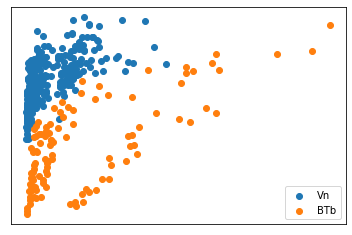

In [7]:
# let's load a few libraries that we will need
import librosa
import numpy as np
import matplotlib.pyplot as plt

###############################################################
# we will work with two features                              #
#                                                             #
# we will extract these features from all relevant datapoints #
###############################################################

# get all the track_ids
all_tracks = tinysol.track_ids

# create a "data" matrix with two columns, whose rows correspond to datapoints

# The "data" matrix should ONLY contain Violin and Bass Tuba datapoints.

# Extract the two best features that you think will help you "separate"
# these two musical instruments.

# Also crate a "labels" matrix with only one column.
# Every entry in "labels" should either be a 0 or a 1, depending on
# whether the corresponding row of "data" contains a Violin or a Bass Tuba 
# datapoint. 0=="Vn" and 1=="BTb"

data = []
labels = []
for t in all_tracks:  
  if # your code here
    x,sr = # your code here
    # feature 1. 
    f1 = # your code here
    # feature 2. 
    f2 = # your code here
    
    # concatenate them
    data.append( # your code here
    labels.append( # your code here

data = np.array(data)
labels = np.array(labels)

print("\nThe shape of 'data' is ", data.shape)
print("The shape of 'labels' is ", labels.shape,"\n")

# we can also visualize these features
plt.scatter(data[labels==0,0],data[labels==0,1], label='Vn') 
plt.scatter(data[labels==1,0],data[labels==1,1], label='BTb')
plt.xlabel('Feture No. 1')
plt.ylabel('Feture No. 2')
plt.legend()
plt.show()

# Q: Which two features did you pick and why?
# A: 

# make the x and y axis of the plot have labels that
# indicate the feature you extracted

In [25]:
# now randomly select ~5% of the data and set it apart as test set
# Hint: you can use the np.random.choice function (with replace=False) 
# and use the first ~5% of its output to index out the test set

all_idx = np.random.choice(# your code here

data_ts = data[# your code here
labels_ts = labels[# your code here
data_tr = data[# your code here
labels_tr = labels[# your code here

print("The shape of the training data is ", data_tr.shape)
print("The shape of the training labels is ", labels_tr.shape)
print("The shape of the testing data is ", data_ts.shape)
print("The shape of the testing labels is ", labels_ts.shape)

The shape of the training data is  (372, 2)
The shape of the training labels is  (372,)
The shape of the testing data is  (20, 2)
The shape of the testing labels is  (20,)


In [ ]:
# some libraries we will use
! pip install sklearn
from sklearn.model_selection import KFold
from IPython import display


# now let's standardize our training features to be zero-mean and unit variance
mu_tr = np.mean(data_tr, axis=0)
std_tr = np.std(data_tr,axis=0)
data_tr = (data_tr - mu_tr)/std_tr

# Make sure you only run this cell once. Why? 

In [ ]:
# Here's the main body of this homework

# we will use k-fold cross validation to optimize a simple logistic regression
# model using gradient descent. 

# let's start by defining our independent (x) and dependent (y) variables
# hint: x will have the featues and y will have the 0 or 1 labels

# Q: what do you expect the shape of x and y should be?
# A:

x = # your code here
y = # your code here

# Now define the learning variables for the optimization algorithm
epochs = # your code here
lr = # your code here
# Q: How can we know how many epochs we should let the model learn?

# we are ready to start the optimization routine
# using sklearn.Kfold, we will split the data into 5 folds
# and we will use each fold as validation set in a for loop
n_splits = 5
kf = KFold(n_splits=n_splits)
# we will also save the slope and bias terms that we find
# for each fold in a list
ws = []
bs = []
all_Jtrs = []
all_Jvls = []
for ifold, (tr_idx, vl_idx) in enumerate(kf.split(x)):

  print("\n#######################")
  print("# training fold No. {} #".format(ifold+1))
  print("#######################\n")  

  # organize the data into training and validation splits
  x_tr, x_vl = x[tr_idx], x[vl_idx]
  y_tr, y_vl = y[tr_idx], y[vl_idx]
    
  # intialize the slope and bias as
  # random numbers drawn from a normal
  # distribution with a small variance. Why?
  # A:
  # (hint: use np.random.randn)
  w = # your code here
  b = # your code here

  # we will repeatedly show the data 
  # to out gradient descent
  # algorithm a few times 
  Jtrs = []
  Jvls = []
  for e in range(epochs):
    
    # compute y_hat with the training data
    # Q: what do you expect the initial average y_hat_tr (training) to be? why?
    # A:         
    y_hat_tr = # your code here
    # compute y_hat with the validation data
    # Q: what do you expect the initial average y_hat_vl (validation) to be? why?
    # A:             
    y_hat_vl = # your code here
    # Q: what does each value in y_hat (training or validation) mean?
    # A:

    # compute the loss function with the training data
    # Q: what do you expect the initial training loss to be?
    # A: 
    J_tr = # your code here
    
    # compute the loss function with the validation data
    # Q: what do you expect the initial validation loss to be?
    # A:     
    J_vl = # your code here

    # Hint: print the initial y_hat and J values before training the model
    # If you do not see the initial values that you expect, you are likely
    # doing something wrong and the model will not be able to learn

    # save the training and validation loss to visualize at the end
    Jtrs.append(J_tr)
    Jvls.append(J_vl)

    print("at epoch {} the training loss J_tr = {:.5f}".format(e+1,J_tr))
    print("          and validation loss J_vl = {:.5f}".format(J_vl))
    
    # now compute the gradient of w and b
    dw = # your code here
    db = # your code here

    # and update w and b
    w = w - lr*dw
    b = b - lr*db    

  # let's save the fold's optimized parameters and each epoch tr and vl loss
  ws.append(w)
  bs.append(b)
  all_Jtrs.append(Jtrs)
  all_Jvls.append(Jvls)    

for i in range(n_splits):
  print("for fold No.",i+1, ", the optimized parameters were \nw=", ws[i], "\nb=",bs[i])

In [ ]:
print("\nPlotting the training and validation losses:\n")

plt.plot(np.array(all_Jtrs).T)
plt.title('Training loss (each line is a different fold)')
plt.xlabel('Epoch No.')
plt.ylabel('J')
plt.ylim([0,0.8])
plt.show()
plt.plot(np.array(all_Jvls).T)
plt.title('Validation loss (each line is a different fold)')
plt.xlabel('Epoch No.')
plt.ylabel('J')
plt.ylim([0,0.8])
plt.show()
plt.title('Loss (mean across folds)')
plt.plot(np.mean(np.array(all_Jtrs),axis=0),label='Training')
plt.plot(np.mean(np.array(all_Jvls),axis=0),label='Validation')
plt.xlabel('Epoch No.')
plt.ylabel('J')
plt.ylim([0,0.8])
plt.legend()
plt.show()

# Q: how do the losses differ between folds? why do you think this is seen?
# A:

# Q: how do the losses differ between training and validation splits? why do you think this is seen?
# A:

# Q: is your model overfit, underfit, or properly optimized? how do you know this?
# A:

# Q: Did your loss go close to zero? why? Is this good or bad?
# A:

In [22]:
import sklearn

####################
# model evaluation #
####################

# now you have a list of 'w' and a list of 'b' parameters
# to evaluate the model, we only need one, not five. 
# Q: how would you go about getting a single 'w' and a single 'b'?
# A:

w = # your code here
b = # your code here

# Now, using your optimized 'w' and 'b' calculate the training accuracy by comparing y_hat and y
y_hat = # your code here
training_accuracy = # your code here
print("The training acc was: {:.2f}%\n".format(training_accuracy))

# Now compute a confusion matrix
# Hint: use sklearn.metrics.confusion_matrix
conf_mat = sklearn.metrics.confusion_matrix(# your code here

print("The training confusion matrix: ")
print(conf_mat)

# Now calculate the "true positive rate", Q: What does positive stand for here?
# Q: Can we calculate the "true positive rate" if we are classifying musical
# instrument sounds and not whether something is true or false? why?
# A:
print("\nThe true positive rate:")
print(# your code here
# Q: What does the "true positive rate" tell us?
# A:

# Q: How do you calculate the "true negative rate"?
print("\nThe true negative rate:")
print(# your code here
# Q: What does the "true negative rate" tell us?
# A:

# Q: How do you calculate the "false positive rate"
print("\nThe false positive rate:")
print(# your code here
# Q: What does the "false positive rate" tell us?
# A:

# Q: How do you calculate the "false negative rate"
print("\nThe false negative rate:")
print(# your code here
# Q: What does the "false negative rate" tell us?
# A:

# Q: Do you have the same number of Violin and Bass Tuba datapoints in the
# training data? 
# A:
# Q: Can this imbalance affect your classification algorithm? How?
# A:
# HINT: If you balance your training data to have the same number of
# datapoints in each class, and you optimize your classification model with 
# such a dataset, you will likely develop a be more robust model. Why?
# A:

The training acc was: 94.09%

The training confusion matrix: 
[[273   0]
 [ 22  77]]

The true positive rate:
100.0 %

The true negative rate:
77.77777777777777 %

The false positive rate:
22.22222222222222 %

The false negative rate:
0.0 %


In [ ]:
# Let's also visualize the logistic regression on the training data

# Here, "theta" is the value that gets negated to be the power of e in the
# logistic regression formula. Calculate "theta" using all the training datapoints
theta = # your code here

plt.figure(figsize=(30,10))
xaxis = np.linspace(-3,3,100)
plt.scatter(theta[y==0],y_hat[y==0],label='Vn')
plt.scatter(theta[y==1],y_hat[y==1],label='BTb')
plt.plot(xaxis,1/(1+np.exp(-xaxis)))
plt.legend()
plt.ylim([-0,1])
plt.grid()
plt.show()

# Q: What does this plot tell us about what our model was able to learn?
# A: 

# Q: what is the x axis in this plot?
# A:

# Q: what is the y axis in this plot?
# A:

##################################################################################
# ATTENTION: DO NOT move to the next cell until you have a well-optimized model. #
# continuing without a well-optimized model will ruin the model evaluation.      #
##################################################################################

In [26]:
##################################################################
# RUN THIS CELL ONLY ONCE WHEN YOU ARE DONE WITH THE CELLS ABOVE #
# Running this cell more than once is a violation of             #
# international Machine Learning Law                             #
##################################################################

# now do the same evaluation with the test set

# IMPORTANT: you will have to standardize the test data using the training data mu and std
# Q: why do we standardize the test data with the training mu and std?
# A:

data_ts = # your code here

x_ts = # your code here
y_ts = # your code here

# Now, using your optimized 'w' and 'b' calculate the training accuracy by comparing y_hat and y
y_hat = # your code here
testing_accuracy = # your code here
print("The testing acc was: {:.2f}%\n".format(testing_accuracy))

# Now compute a confusion matrix
# Hint: use sklearn.metrics.confusion_matrix
conf_mat = sklearn.metrics.confusion_matrix(# your code here

print("The testing confusion matrix: ")
print(conf_mat)

# Now calculate the "true positive rate", where positive means "Violin"
print("\nThe true positive rate:")
print(# your code here

print("\nThe true negative rate:")
print(# your code here

print("\nThe false positive rate:")
print(# your code here

print("\nThe false negative rate:")
print(# your code here


The testing acc was: 100.00%

The testing confusion matrix: 
[[17  0]
 [ 0  3]]

The true positive rate:
100.0 %

The true negative rate:
100.0 %

The false positive rate:
0.0 %

The false negative rate:
0.0 %


In [ ]:
# Q: were your optimized 'w' and 'b' parameters good for the test set data? how do you know if they were or not?
# A: 

# Q: which was lower, the training or the test error? Why?
# A: 

In [ ]:
# CHALLENGE (without doing this, the highest score you can earn in this homework is 95/100)

# It is possible to carry out binary classification using linear regression
# Q: Why do we use logistic regression then? A:

# In the cells below, use linear regression to carry out this binary classification task

# NOTE: Being able to do this challenge serves as a good check for understanding of
# the regression concepts (both linear and logistic non-linear) covered so far in class